In [ ]:
import sys
import tensorflow as tf
from tensorflow.keras import Sequential, layers, utils
import pandas as pd
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib notebook
from math import hypot
from itertools import combinations

In [ ]:
f_error = pd.read_csv('error.txt')
gin = pd.read_csv('fin_python.txt')
# f_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# f_error = f_error[f_error['error'].notna()]

#dataframe多条件排序
#第二列是在第一列排序基础上继续排序，也就是当第一列值相同的时候再去排对应的第二列
#x在y从大到小（y:169 to -169）排列的基础上，从小到大（x:-169 to 169）排列
f_error = f_error.sort_values(by = ['center_y','center_x'], ascending = (False, True))
# len(f_error[f_error['center_y']==-39])
# len(f_error[f_error['center_y']==163])
# f_error['cordinate_row'] = np.nan
# f_error['cordinate_col'] = np.nan
# f_error

In [ ]:
d = 2
r = (d**2 + d**2)**0.5
d_xl = 2*3

<IPython.core.display.Javascript object>


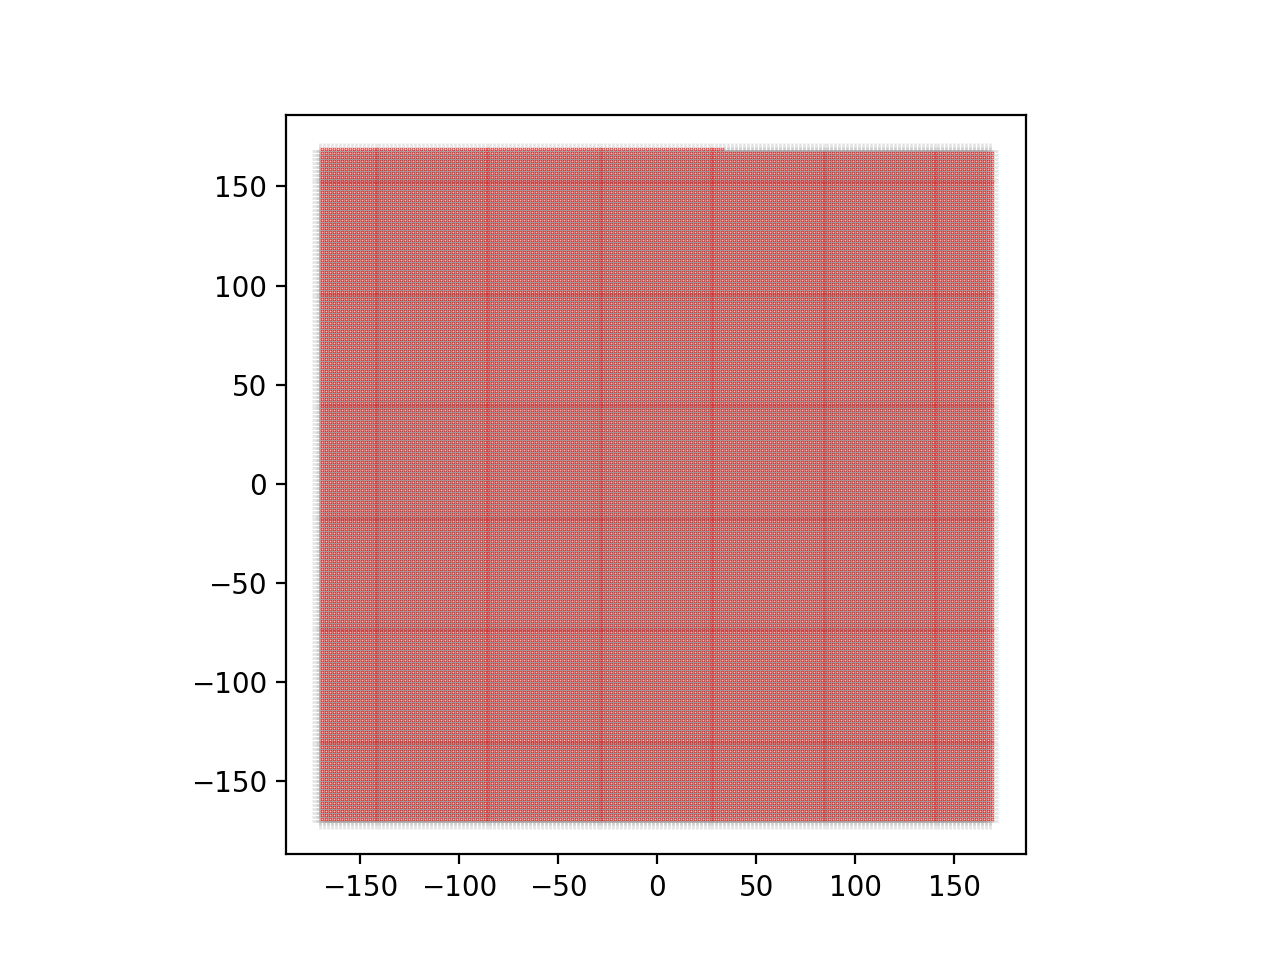

In [ ]:
x_axis = np.arange(-170,170,d)
y_axis = np.arange(-170,170,d)
X,Y = np.meshgrid(x_axis,y_axis)

plt.plot(X,Y, marker='+', color='grey', linestyle='none',alpha=0.2)
plt.plot(f_error['center_x'],f_error['center_y'], marker='.',markersize=0.4, color='red', linestyle='none')
plt.gca().set_aspect('equal') #set same ratio for x and y axis
plt.show()

In [ ]:
gin.head()

,x,y,z
0,-170.000000,100.000000,-0.0
1,-169.998515,100.456725,-0.0
2,-169.994067,100.912786,-0.0
3,-169.986668,101.368172,-0.0
4,-169.976328,101.822874,-0.0


In [ ]:
# # 左下xy，右下xy，左上xy，右上点xy, 中点xy,
# pd.options.mode.chained_assignment = None
# grid_cordinate = [list(i) for i in zip(X.flat, Y.flat,
#                                        (X+d_xl).flat, Y.flat,
#                                        X.flat, (Y+d_xl).flat,
#                                        (X+d_xl).flat, (Y+d_xl).flat)]
# for grid in grid_cordinate:
#     error_grid = f_error[(f_error['center_x'] >= grid[0])
#                          & (f_error['center_x'] < grid[2])
#                          & (f_error['center_y'] >= grid[1])
#                          & (f_error['center_y']< grid[5])]
#     print(len(error_grid))
#     print()

In [ ]:
#center point 一共170行
len(f_error['center_y'].value_counts())

170

In [ ]:
y_cord = 169
row = 0
arr = []
arr_col = []
while y_cord >= -169:
    arr += [row]*len(f_error[f_error['center_y']==y_cord])
    for col in range(0,len(f_error[f_error['center_y']==y_cord])):
        arr_col += [col]

    y_cord -= 2
    row += 1

arr = pd.DataFrame(arr[::-1], columns = ["row"])
f_error['row'] = arr

f_error['col'] = arr_col

f_error

# len(f_error['center_y'])
# ls_point = list(zip(f_error['center_x'],f_error['center_y'], f_error['center_z']))

,center_x,center_y,center_z,error,row,col
28730,-169.0,169.0,NaN,NaN,0,0
28731,-167.0,169.0,NaN,NaN,0,1
28732,-165.0,169.0,NaN,NaN,0,2
28733,-163.0,169.0,NaN,NaN,0,3
28734,-161.0,169.0,NaN,NaN,0,4
...,...,...,...,...,...,...
165,161.0,-169.0,NaN,NaN,169,165
166,163.0,-169.0,NaN,NaN,169,166
167,165.0,-169.0,NaN,NaN,169,167
168,167.0,-169.0,NaN,NaN,169,168


In [ ]:
# def dist(point, centerpt):
#     xc,yc = centerpt
#     x,y = point
#     return hypot(xc-x, yc-y)

# ls_point = list(zip(f_error['center_x'],f_error['center_y'], f_error['center_z']))

# print([dist(*combo) for combo in combinations(ls_point,2)])



# ls_point = list(zip(f_error['center_x'],f_error['center_y']))
# distances_matrix = np.array([np.linalg.norm((item*np.ones((len(ls_point),len(item))))-ls_point,axis=1) for item in ls_point])


In [ ]:
f_error

,center_x,center_y,center_z,error,row,col
28730,-169.0,169.0,NaN,NaN,0,0
28731,-167.0,169.0,NaN,NaN,0,1
28732,-165.0,169.0,NaN,NaN,0,2
28733,-163.0,169.0,NaN,NaN,0,3
28734,-161.0,169.0,NaN,NaN,0,4
...,...,...,...,...,...,...
165,161.0,-169.0,NaN,NaN,169,165
166,163.0,-169.0,NaN,NaN,169,166
167,165.0,-169.0,NaN,NaN,169,167
168,167.0,-169.0,NaN,NaN,169,168


In [ ]:
# f_error = f_error[f_error['error'].notna()]
f_error

,center_x,center_y,center_z,error,row,col
28730,-169.0,169.0,NaN,NaN,0,0
28731,-167.0,169.0,NaN,NaN,0,1
28732,-165.0,169.0,NaN,NaN,0,2
28733,-163.0,169.0,NaN,NaN,0,3
28734,-161.0,169.0,NaN,NaN,0,4
...,...,...,...,...,...,...
165,161.0,-169.0,NaN,NaN,169,165
166,163.0,-169.0,NaN,NaN,169,166
167,165.0,-169.0,NaN,NaN,169,167
168,167.0,-169.0,NaN,NaN,169,168


In [ ]:
row = 0
z_matrix = []
error_matrix = []

while row <= f_error['row'].max():
    pt = f_error[f_error['row']==row]
    grid_cordinate = list(pt['center_z'])
    z_matrix.append(grid_cordinate)

    error_cordinate = list(pt['error'])
    error_matrix.append(error_cordinate)
    row += 1

from itertools import zip_longest
# pd.DataFrame(point_matrix)
error_matrix = np.array(list(zip_longest(*error_matrix, fillvalue= np.nan)))
# z_matrix = np.array(list(zip_longest(*z_matrix, fillvalue= z_matrix[len(z_matrix)-1])))
z_matrix = np.array(list(zip_longest(*z_matrix, fillvalue= 0)))

In [ ]:
# data_tf = tf.convert_to_tensor(point_matrix, np.float32)

# data_tf

In [ ]:
error_matrix.shape

(170, 170)

In [ ]:
z_matrix.shape

(170, 170)

In [ ]:

def rolling_window(a, shape):
    s = (a.shape[0] - shape[0] + 1,) + (a.shape[1] - shape[1] + 1,) + shape
    strides = a.strides + a.strides
    return np.lib.stride_tricks.as_strided(a, shape=s, strides=strides)

def window2(arr, shape=(3, 3)):
    r_extra = np.floor(shape[0] / 2).astype(int)
    c_extra = np.floor(shape[1] / 2).astype(int)
    out = np.empty((arr.shape[0] + 2 * r_extra, arr.shape[1] + 2 * c_extra))
    out[:] = np.nan
    out[r_extra:-r_extra, c_extra:-c_extra] = arr
    view = rolling_window(out, shape)
#     print(rolling_window(out, shape))
    return view

# window2(z_matrix,(3,3))
error_sqmatrix = window2(error_matrix,(3,3))
z_sqmatrix = window2(z_matrix,(3,3))

# z_sqmatrix.shape
# output:(170, 170, 3, 3)

# z_sqmatrix

In [ ]:
# error_sqmatrix

In [ ]:
# model_x = []
# import itertools
# for row in z_sqmatrix:
#     out = []
#     for col in row:
# #         print(list(itertools.chain.from_iterable(col)))
#         out.append(list(itertools.chain.from_iterable(col)))
#     model_x.append(out)


# # model_x
# model_x = np.array(model_x)
# model_x.shape

In [ ]:
# model_y = []

# for row in error_sqmatrix:
#     out = []
#     for col in row:
# #         print(col)
# #         print(col[1,1])
#         out.append(col[1,1])
# #         out.append(list(itertools.chain.from_iterable(col)))
#     model_y.append(out)

# model_y = np.array(model_y)
# model_y.shape

In [ ]:
#中间点坐标是[大行，大列，9格的1行，9格的1列]
# z_sqmatrix[0,27]
#          [nan,             nan,             nan            ],
#          [ 0.00000000e+00, -6.69697143e-02, -1.75795500e-01],
#          [-4.27424118e-01, -6.39255909e-01, -7.36666286e-01]

# error_sqmatrix[0,27]
# array([[        nan,         nan,         nan],
#        [        nan, -4.13421728, -4.09667037],
#        [-3.95238046, -3.85273341, -3.81147901]])

# z_sqmatrix[0,27,1,1]
# output: -0.0669697142857142

# error_sqmatrix[0,27,1,1]
#output: -4.134217275460144

In [ ]:
model_x = []
import itertools
for row in z_sqmatrix:
    for col in row:
#         print(list(itertools.chain.from_iterable(col)))
        model_x.append(list(itertools.chain.from_iterable(col)))


# model_x
# model_x = np.array(model_x)
# model_x

In [ ]:
model_y = []

for row in error_sqmatrix:
    for col in row:
#     for col_idx in range(0,3):
#         print(list(itertools.chain.from_iterable(col)))
        model_y.append(list(itertools.chain.from_iterable(col))[4])

# model_x
model_y = np.array(model_y)
model_y.shape

(28900,)

In [ ]:
# model_x = np.nan_to_num(model_x)
# model_x

In [ ]:
# model_y = np.nan_to_num(model_y,nan = f_error['error'].mean())
# model_x

In [ ]:
model_x[0]# input of prediction model

[nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [ ]:
model_y[0] #output of prediction model

nan

In [ ]:
f = open("trainning_file.txt", "w")
f.write("data_input | label" + "\n" )
for i in range(0, len(model_x)):
    if "nan" not in str(model_x[i]) and "nan" not in str(model_y[i]):
        f.write(str(model_x[i]).replace('[','').replace(']','') + " | " + str(model_y[i]) + "\n")
    else:
        pass
#         f.write(str(model_x[i].tolist()) + "|" + str(model_y[i].tolist()) + "\n")

## reshape dataset

In [ ]:
def create_dataset(X, y, seq_len=1):
    features = []
    targets = []

    for i in range(0, len(X)):
        data = [[i] for i in X[i]] # 序列数据
        label = [y[i]] # 标签数据

        # 保存到features和labels
        features.append(data)
        targets.append(label)

    # 返回
    return np.array(features), np.array(targets)

In [ ]:
# ③ 数据集切分
# 功能函数：基于新的特征的数据集和标签集，切分：X_train, X_test

def split_dataset(x, y, train_ratio=0.8):

    x_len = len(x) # 特征数据集X的样本数量
    train_data_len = int(x_len * train_ratio) # 训练集的样本数量

    x_train = x[:train_data_len] # 训练集
    y_train = y[:train_data_len] # 训练标签集

    x_test = x[train_data_len:] # 测试集
    y_test = y[train_data_len:] # 测试集标签集

    # 返回值
    return x_train, x_test, y_train, y_test

In [ ]:
def create_batch_dataset(X, y, train=True, buffer_size=1000, batch_size=128):
    batch_data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) # 数据封装，tensor类型
    if train: # 训练集
        return batch_data.cache().shuffle(buffer_size).batch(batch_size)
    else: # 测试集
        return batch_data.batch(batch_size)

In [ ]:
model_x,model_y = create_dataset(model_x, model_y, seq_len=1)

In [ ]:
if "nan" in str(model_y[0].tolist()):
    print("yep")

yep


In [ ]:
 if "nan" not in str(model_x[0].tolist()) or "nan" not in str(model_y[0].tolist()):
        print("yep")

In [ ]:
len(model_x)

28900

In [ ]:
x_train, x_test, y_train, y_test = split_dataset(model_x, model_y, train_ratio=0.8)

In [ ]:
x_train.shape

(23120, 9, 1)

In [ ]:
y_train.shape

(23120, 1)

In [ ]:
x_test.shape

(5780, 9, 1)

In [ ]:
y_test.shape

(5780, 1)

In [ ]:
train_batch_dataset = create_batch_dataset(x_train, y_train)
test_batch_dataset = create_batch_dataset(x_test, y_test, train=False)

In [ ]:
test_batch_dataset

<BatchDataset shapes: ((None, 9, 1), (None, 1)), types: (tf.float64, tf.float64)>

In [ ]:
# list(test_batch_dataset.as_numpy_iterator())[0]

In [ ]:
model = Sequential([
    layers.LSTM(8),
    layers.Dense(1)
])

In [ ]:
file_path = "best_checkpoint.hdf5"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=file_path,
                                                         monitor='loss',
                                                         mode='min',
                                                         save_best_only=True,
                                                         save_weights_only=True)

In [ ]:
model.compile(optimizer='adam', loss="mse") #or mae

In [ ]:
history = model.fit(train_batch_dataset,
          epochs=10,
          validation_data=test_batch_dataset,
          callbacks=[checkpoint_callback])

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


NotImplementedError: Cannot convert a symbolic Tensor (sequential_8/lstm_8/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported